# SMU BOSS Bid Price Analytics

### Import necessary libraries

In [1]:
import pandas as pd
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import DataConversionWarning

from analytics import Analytics

### Data Preprocessing

In [2]:
data_frame = pd.read_excel("data/merged_file.xls")
analytics = Analytics(data_frame)

## Specify Course Code

In [3]:
course_code = "COR-STAT1202"

### Explore Bid Price for the specified course code

In [4]:
# min_median_value = course_data["Median Bid"].min()
# max_median_value = course_data["Median Bid"].max()
# median_median_value = round(course_data["Median Bid"].median(), 2)
# mean_median_value = round(course_data["Median Bid"].mean(), 2)
# course_code = "COR-STAT1202"
[min_median_value, max_median_value, median_median_value, mean_median_value] = analytics.get_min_max_median_mean_median_bid_values_by_course_code_and_instructor(course_code)

print(f"The min, max, median and mean values for ALL of {course_code}'s median bid prices are {min_median_value, max_median_value, median_median_value, mean_median_value} respectively.")

The min, max, median and mean values for ALL of COR-STAT1202's median bid prices are (10.0, 100.0, 30.0, 31.62) respectively.


### Which Instructors teach the specified course?

In [5]:
unique_instructors = analytics.get_instructors_by_course_code(course_code)
print(f"Instructors that teach {course_code}: {unique_instructors}")

Instructors that teach COR-STAT1202: ['WU ZHENGXIAO' 'KWONG KOON SHING' 'ROSIE CHING' 'DANIEL SOH'
 'ZHANG YAJIE' 'RAYMOND TEO' 'LIU SHEW FAN' 'YEO KENG LEONG'
 'GAN CHUI GOH' 'GOH JING RONG' 'DEBANJALI ROY' 'DENIS LEUNG']


## Filter dataframe by Instructor

In [6]:
instructor_name = "YEO KENG LEONG"

instructor_course_data = analytics.filter_by_course_code_and_instructor(course_code, instructor_name)

print(f"Instructor Course Data Shape: {instructor_course_data.shape}")
instructor_course_data.head()

Instructor Course Data Shape: (65, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
7594,2022-23 Term 1,Regular Academic Session,Round 1B Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,6.0,5.0,10.0,15.07,15.07,YEO KENG LEONG,SOE,1.0
9720,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,6.0,5.0,10.0,24.92,24.92,YEO KENG LEONG,SOE,1.0
10797,2022-23 Term 1,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G22,45.0,15.0,8.0,5.0,10.0,31.89,23.00,YEO KENG LEONG,SOE,3.0
11874,2022-23 Term 1,Regular Academic Session,Round 1 Window 1,COR-STAT1202,Introductory Statistics,G22,45.0,10.0,10.0,3.0,7.0,28.88,18.56,YEO KENG LEONG,SOE,7.0
15051,2022-23 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 2,COR-STAT1202,Introductory Statistics,G22,45.0,45.0,18.0,0.0,45.0,24.11,20.00,YEO KENG LEONG,SOE,18.0


### Explore Bid Price for the specified instructor for the specified course

In [7]:
# min_course_median_value = instructor_course_data["Median Bid"].min()
# max_course_median_value = instructor_course_data["Median Bid"].max()
# median_course_median_value = round(instructor_course_data["Median Bid"].median(), 2)
# mean_course_median_value = round(instructor_course_data["Median Bid"].mean(), 2)

[min_course_median_value, max_course_median_value, median_course_median_value, mean_course_median_value] = analytics.get_min_max_median_mean_median_bid_values_by_course_code_and_instructor(course_code, instructor_name)
print(f"The min, max, median and mean values for {instructor_name}'s {course_code} median bid prices are {min_course_median_value, max_course_median_value, median_course_median_value, mean_course_median_value} respectively.")

The min, max, median and mean values for YEO KENG LEONG's COR-STAT1202 median bid prices are (10.0, 63.29, 30.1, 33.02) respectively.


## Filter dataframe by Academic Year and/or Term

In [8]:
AY = "2022-23"
# Filter by Term (Term 1 or Term 2)?
term = "Term 2"
if term:
    AY += f" {term}"
    
instructor_course_data = instructor_course_data.sort_values(by="Bidding Window", ignore_index=True)
instructor_course_data = instructor_course_data[instructor_course_data["Term"].str.contains(AY, case=False)]
print(f"{instructor_name} taught {len(instructor_course_data['Term'].to_list())} classes for {course_code} in {AY} ")
instructor_course_data.head()

YEO KENG LEONG taught 6 classes for COR-STAT1202 in 2022-23 Term 2 


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
18,2022-23 Term 2,Regular Academic Session,Round 1 Window 1,COR-STAT1202,Introductory Statistics,G16,45.0,38.0,38.0,6.0,32.0,30.10,10.00,YEO KENG LEONG,SOE,32.0
26,2022-23 Term 2,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G16,45.0,40.0,8.0,0.0,40.0,43.51,41.88,YEO KENG LEONG,SOE,8.0
41,2022-23 Term 2,Regular Academic Session,Round 1A Window 1,COR-STAT1202,Introductory Statistics,G16,45.0,42.0,2.0,0.0,42.0,52.22,47.89,YEO KENG LEONG,SOE,2.0
49,2022-23 Term 2,Regular Academic Session,Round 1A Window 2,COR-STAT1202,Introductory Statistics,G16,45.0,43.0,1.0,0.0,43.0,51.22,51.22,YEO KENG LEONG,SOE,1.0
52,2022-23 Term 2,Regular Academic Session,Round 1B Window 1,COR-STAT1202,Introductory Statistics,G16,45.0,45.0,2.0,0.0,45.0,52.16,49.31,YEO KENG LEONG,SOE,2.0


## Bid Price Visualisation for specified prof, course, AY and/or Term:

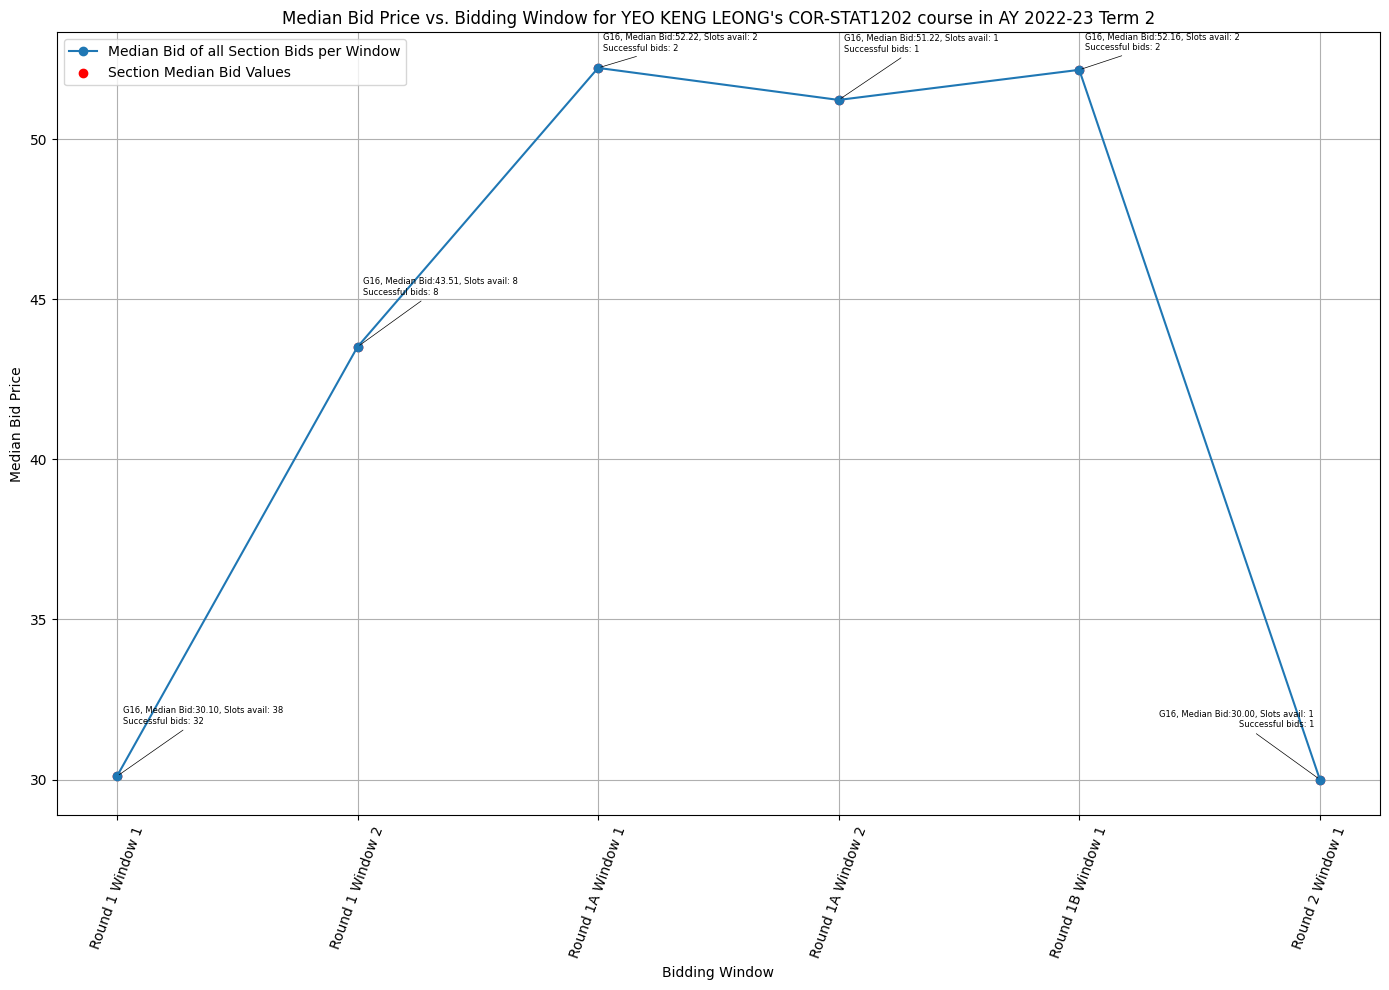

In [9]:
median_bid_by_window = instructor_course_data.groupby('Bidding Window')['Median Bid'].median().reset_index()

plt.figure(figsize=(14, 10))

# Plot the median bid values by window as a line
plt.plot(
    median_bid_by_window["Bidding Window"],
    median_bid_by_window["Median Bid"],
    marker="o",
    label='Median Bid of all Section Bids per Window'
)

# Plot all individual bid values as points
plt.scatter(
    instructor_course_data["Bidding Window"],
    instructor_course_data["Median Bid"],
    color="red",
    label="Section Median Bid Values"
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name}'s {course_code} course in AY {AY}")
plt.xlabel("Bidding Window")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()

max_y_values = {}

# Annotate data points with their "Section" value and adjust y-coordinate
annotations = []
for x, y, sem, section, slots_avail, round_successful_bids in zip(instructor_course_data["Bidding Window"], instructor_course_data["Median Bid"],instructor_course_data["Term"], instructor_course_data["Section"], instructor_course_data["Before Process Vacancy"], instructor_course_data["round_successful_bids"]):
    max_y = max_y_values.get(x, 0) 
    y_offset = max_y + 2
    max_y_values[x] = y_offset
    displayed_text = f"{section}, Median Bid:{y:.2f}, Slots avail: {int(slots_avail)}\nSuccessful bids: {int(round_successful_bids)}"
    if not term:
        displayed_text = f"Term {sem[-1]} {displayed_text}"
        print(displayed_text)
    annotation = plt.annotate(displayed_text, (x, y),
                            textcoords="offset points",
                            xytext=(0, y_offset),
                            ha="center", fontsize=6,
                            arrowprops=dict(arrowstyle="-", lw=0.5, color="black"))
    annotations.append(annotation)

# Use the adjust_text function to adjust the position of overlapping annotations
adjust_text(annotations, autoalign="xy", only_move={"points": "xy"})

plt.legend()
plt.show()

## Visualise each Instructor's min, mean and median bids with a Bar chart

In [10]:
# we want to create our own dataframe with the min, max mean and median median bid values
data = []

for instructor_name in unique_instructors:
    instructor_data = course_data[course_data["Instructor"] == instructor_name.strip()]
    min_value = instructor_data["Median Bid"].min()
    max_value = instructor_data["Median Bid"].max()
    median_value = round(instructor_data["Median Bid"].median(), 2)
    mean_value = round(instructor_data["Median Bid"].mean(), 2)
    data.append([instructor_name, min_value, max_value, mean_value, median_value])

# Create a DataFrame from the collected results
data_df = pd.DataFrame(data, columns=["Instructor", "Min Median Bid", "Max Median Bid", "Median Median Bid", "Mean Median Bid"])
print(data_df)
data_df.head()


NameError: name 'course_data' is not defined

In [ ]:
# choose bars you want to show:
show_min_bar = True
show_max_bar = True
show_median_bar = True
show_mean_bar = True

# Create an array of x-coords for each instructor
x = np.arange(len(data_df["Instructor"]))

group_width = 0.2 

# Create a vertical bar chart with no spaces between bars within an instructor's group
plt.figure(figsize=(14, 10))

bar_chart_annotations = []
def add_values_on_bars(bars):
    global bar_chart_annotations
    for bar in bars:
        height = bar.get_height()
        annotation = plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                                    xytext=(0, 6), 
                                    textcoords="offset points", 
                                    ha="center", 
                                    va="bottom", 
                                    fontsize=6)
        bar_chart_annotations.append(annotation)

if show_min_bar:
    min_bars = plt.bar(x - 1.5*group_width, data_df["Min Median Bid"], width=group_width, label="Min Median Bid", alpha=0.7, color="green")
    add_values_on_bars(min_bars)
if show_max_bar:
    max_bars = plt.bar(x - 0.5*group_width, data_df["Max Median Bid"], width=group_width, label="Max Median Bid", alpha=0.7, color="grey")
    add_values_on_bars(max_bars)
if show_median_bar:
    median_bars = plt.bar(x + 0.5*group_width, data_df["Median Median Bid"], width=group_width, label="Median Median Bid", alpha=0.7, color="red")
    add_values_on_bars(median_bars)
if show_mean_bar:
    mean_bars = plt.bar(x + 1.5 * group_width, data_df["Mean Median Bid"], width=group_width, label="Mean Median Bid", alpha=0.7, color="blue")
    add_values_on_bars(mean_bars)


adjust_text(bar_chart_annotations, autoalign="y", only_move={"points": "y"})

plt.xticks(x, data_df["Instructor"], rotation=60)
plt.xlabel("Instructor")
plt.ylabel("Bid Price")
plt.title(f"All-time Min, Max, Median, Mean values of the Median bid price for each Instructor teaching {course_code}")
plt.legend()

plt.tight_layout()
plt.show()

: 

## Lets visualise the year over year bid prices for a specified BIDDING WINDOW AND INSTRUCTOR

In [ ]:
specified_bidding_window = "Round 1 Window 1"

# re-initialise instructor_course_data dataframe as we do not want to use the instructor_course_data df above which has been filtered to the specified year
# instructor_name = "GILBERT TAN YIP WEI"
print(instructor_name_dummy)
print(f"Dataframe containing the Mean median bid price across the terms for {instructor_name_dummy}:")
instructor_course_data = course_data[course_data["Instructor"] == instructor_name_dummy]
window_course_data = instructor_course_data[instructor_course_data["Bidding Window"] == specified_bidding_window]
window_course_data = window_course_data.sort_values(by="Term", ascending=True)

# Group filtered data by year and calculate the mean Median Bid for each year
yearly_instructor_course_data = window_course_data.groupby("Term")["Median Bid"].mean().reset_index()
yearly_instructor_course_data = yearly_instructor_course_data.sort_values(by="Term", ascending=True)

# renamed yearly_data df column headers to aid better understanding
yearly_instructor_course_data.rename(columns={"Median Bid": "Mean of Median Bids"}, inplace=True)
yearly_instructor_course_data.head()


: 

### Lets use a Linear Regression model to plot a best fit line and make bid price predictions for future Terms

In [ ]:
# We will perform label encoding for the Terms
label_encoder = LabelEncoder()
yearly_instructor_course_data["Term"] = label_encoder.fit_transform(yearly_instructor_course_data["Term"])

X = yearly_instructor_course_data[["Term"]]
Y = yearly_instructor_course_data["Mean of Median Bids"]

reg_model = LinearRegression()
reg_model.fit(X, Y)

yearly_instructor_course_data.head()

: 

In [ ]:
# Find the latest term and calculate the upcoming term as the next integer value
latest_term = yearly_instructor_course_data["Term"].max()
upcoming_term = latest_term + 1

predicted_bid_upcoming_term = reg_model.predict([[upcoming_term]])

print(f"Predicted Median Bid for the upcoming Term: {predicted_bid_upcoming_term[0]:.2f}")

: 

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(
    yearly_instructor_course_data["Term"],
    yearly_instructor_course_data["Mean of Median Bids"],
    marker="x",
    label="Mean of Median Bids"
)

plt.scatter(
    window_course_data["Term"],
    window_course_data["Median Bid"],
    color="red",
    label="Individual Section Median Bid Values"
)

# Lets use out linear reg model to plot a best fit line
plt.plot(X, reg_model.predict(X), color="red", label="Best-Fit Line for section median bids")

plt.scatter(
    upcoming_term,
    predicted_bid_upcoming_term,
    color='green',
    marker='o',
    s=100,
    label=f'Predicted Bid for the next term'
)

# Annotate the predicted point with its value
plt.annotate(
    f"Upcoming Term\nPredicted Bid: {predicted_bid_upcoming_term[0]:.2f}",
    (upcoming_term, predicted_bid_upcoming_term),
    textcoords="offset points",
    xytext=(-9.5,10),  # Adjust the position of the text above the point
    ha="center",
    fontsize=9,
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name_dummy}'s {course_code} course in {specified_bidding_window}")
plt.xlabel("Term")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=65)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()

: 

### Lets determine the year over year increase of median bid price

In [ ]:
# We can take the average of the sum of the Term over Term changes in Bid data to estimate the Term over Term increase of bid price
yearly_instructor_course_data["Term over Term Increase"] = yearly_instructor_course_data["Mean of Median Bids"].diff()
average_tot_increase = yearly_instructor_course_data["Term over Term Increase"].mean()
print(f"Estimated TOT rate of change (inflation rate) of bid price by average of the sum of the TOT changes in Bid data: {average_tot_increase:.2f} per Term")
yearly_instructor_course_data.head()

# Also, we can find gradient of the best fit line to estimate the Term over Term increase of bid price
gradient = reg_model.coef_[0]
print(f"Estimated TOT rate of change (inflation rate) of bid price by calculating gradient of the best-fit line: {gradient:.2f} per Term")

: 

### Lets calculate the predicted bids for all profs and their estimated inflation rate for the specified window

In [ ]:
plt.figure(figsize=(12, 8))
label_encoder = LabelEncoder()

# We will use a hashmap like below to encode instead of a label encoder as not al instructors taught all terms
# This will need to be updated every data update
term_mapping = {
    '2019-20 Term 1': 0,
    '2019-20 Term 2': 1,
    '2020-21 Term 1': 2,
    '2020-21 Term 2': 3,
    '2021-22 Term 1': 4,
    '2021-22 Term 2': 5,
    '2022-23 Term 1': 6,
    '2022-23 Term 2': 7,
    '2023-24 Term 1': 8,
    '2023-24 Term 2': 9
}

warnings.filterwarnings("ignore", category=UserWarning)

for instructor_name in unique_instructors:
    instructor_course_data = course_data[course_data["Instructor"] == instructor_name.strip()]
    window_course_data = instructor_course_data[instructor_course_data["Bidding Window"] == specified_bidding_window]
    window_course_data = window_course_data.sort_values(by="Term", ascending=True)

    yearly_instructor_course_data = window_course_data.groupby("Term")["Median Bid"].mean().reset_index()
    yearly_instructor_course_data = yearly_instructor_course_data.sort_values(by="Term", ascending=True)

    yearly_instructor_course_data.rename(columns={"Median Bid": "Mean of Median Bids"}, inplace=True)

    
    # yearly_instructor_course_data["Term"] = label_encoder.fit_transform(yearly_instructor_course_data["Term"])

    # To encode Term, apply the mapping to your DataFrame
    yearly_instructor_course_data['Term'] = yearly_instructor_course_data["Term"].map(term_mapping)

    X = yearly_instructor_course_data[["Term"]]
    Y = yearly_instructor_course_data["Mean of Median Bids"]

    if not X.empty and not Y.empty:
        reg_model = LinearRegression()
        reg_model.fit(X, Y)

        latest_term = yearly_instructor_course_data["Term"].max()
        upcoming_term = latest_term + 1

        predicted_bid_upcoming_term = reg_model.predict([[upcoming_term]])

        print(f"Predicted Median Bid for {instructor_name} in the upcoming Term: {predicted_bid_upcoming_term[0]:.2f}")

        # plt.plot(
        #     yearly_instructor_course_data["Term"],
        #     yearly_instructor_course_data["Mean of Median Bids"],
        #     marker="x",
        #     label="Mean of Median Bids"
        # )

        plt.scatter(
            window_course_data["Term"],
            window_course_data["Median Bid"],
            label=f"_Individual Section Median Bid Values({instructor_name})"
            # underscore such that teh predicted points do not show up in legend, preventing overcrowding
        )


        plt.plot(X, reg_model.predict(X), label=f"Best-Fit Line for section median bids ({instructor_name.strip()})")

        plt.scatter(
            upcoming_term,
            predicted_bid_upcoming_term,
            color="green",
            marker="o",
            s=100,
            label=f"_Predicted Bid for the next term"
        )

        plt.annotate(
            f"{instructor_name.strip()}\nPredicted Bid: {predicted_bid_upcoming_term[0]:.2f}",
            (upcoming_term, predicted_bid_upcoming_term),
            textcoords="offset points",
            xytext=(-9.5,10),
            ha="center",
            fontsize=7,
        )

        yearly_instructor_course_data["Term over Term Increase"] = yearly_instructor_course_data["Mean of Median Bids"].diff()
        average_tot_increase = yearly_instructor_course_data["Term over Term Increase"].mean()
        print(f"Estimated TOT rate of change (inflation rate) of bid price for {instructor_name} by average of the sum of the TOT changes in Bid data: {average_tot_increase:.2f} per Term")
        yearly_instructor_course_data.head()

        gradient = reg_model.coef_[0]
        print(f"Estimated TOT rate of change (inflation rate) of bid price for {instructor_name} by calculating gradient of the best-fit line: {gradient:.2f} per Term\n")
    else:
        print(f"No data for {instructor_name}\n")
    
plt.legend()

plt.title(f"Median Bid Price vs. Bidding Window for all Instructors' {course_code} course in {specified_bidding_window}")
plt.xlabel("Term")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=65)
plt.grid(True)
plt.tight_layout()

plt.show()

: 